In [1]:
##Created By Unfriendly 
#(A simple Jupyter Notebook in Binder for Crypto price prediction)

historical_start = "6yr,0mon,0day,0hr,0min,0sec"
# How long to historically look back at data

predict_into = "0yr,0mon,10day,0hr,0min,0sec" 
# How far to try and predict into the future

In [2]:
import os, glob
for dirname, _, filenames in os.walk('/unfriendly/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
import urllib.request
d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1411862400&period2=1611961174&interval=1d&events=history&includeAdjustedClose=true"


with urllib.request.urlopen(d_u) as testfile, open('dataset.csv', 'w') as f:
    f.write(testfile.read().decode())

In [6]:
data=pd.read_csv('dataset.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-28,399.471008,401.016998,374.332001,377.181000,377.181000,2.361330e+07
1,2014-09-29,376.928009,385.210999,372.239990,375.467010,375.467010,3.249770e+07
2,2014-09-30,376.088013,390.976990,373.442993,386.944000,386.944000,3.470730e+07
3,2014-10-01,387.427002,391.378998,380.779999,383.614990,383.614990,2.622940e+07
4,2014-10-02,383.988007,385.497009,372.946014,375.071991,375.071991,2.177770e+07
...,...,...,...,...,...,...,...
2311,2021-01-25,32285.798828,34802.742188,32087.787109,32366.392578,32366.392578,5.989705e+10
2312,2021-01-26,32358.613281,32794.550781,31030.265625,32569.849609,32569.849609,6.025542e+10
2313,2021-01-27,32564.029297,32564.029297,29367.138672,30432.546875,30432.546875,6.257676e+10
2314,2021-01-28,30441.041016,31891.300781,30023.207031,31649.605469,31649.605469,7.894816e+10


In [7]:
#df1=data['Close']
df1=data['Close']
df1=df1.apply(pd.to_numeric, errors='coerce')
df1=df1.dropna()
df1=df1.reset_index(drop=True)
df1

0         377.181000
1         375.467010
2         386.944000
3         383.614990
4         375.071991
            ...     
2307    32366.392578
2308    32569.849609
2309    30432.546875
2310    31649.605469
2311    34175.660156
Name: Close, Length: 2312, dtype: float64

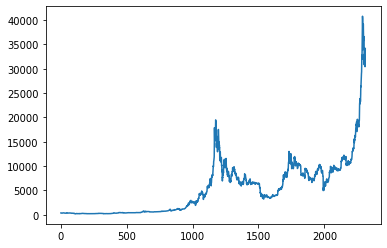

In [8]:
plt.plot(df1)

In [9]:
import numpy as np

In [10]:
df1

0         377.181000
1         375.467010
2         386.944000
3         383.614990
4         375.071991
            ...     
2307    32366.392578
2308    32569.849609
2309    30432.546875
2310    31649.605469
2311    34175.660156
Name: Close, Length: 2312, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(1502, 810)

In [14]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(1401, 100)
(1401,)


(None, None)

In [17]:
print(X_test.shape), print(ytest.shape)

(709, 100)
(709,)


(None, None)

In [18]:
X_train.shape[1]

100

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 26s 920ms/step - loss: 0.0027 - val_loss: 0.0055
Epoch 2/100
22/22 [==============================] - 18s 804ms/step - loss: 5.0375e-04 - val_loss: 0.0041
Epoch 3/100
22/22 [==============================] - 17s 800ms/step - loss: 4.0377e-04 - val_loss: 0.0030
Epoch 4/100
22/22 [==============================] - 18s 805ms/step - loss: 4.2244e-04 - val_loss: 0.0030
Epoch 5/100
22/22 [==============================] - 18s 810ms/step - loss: 3.0271e-04 - val_loss: 0.0028
Epoch 6/100
22/22 [==============================] - 17s 796ms/step - loss: 3.2645e-04 - val_loss: 0.0022
Epoch 7/100
22/22 [==============================] - 18s 818ms/step - loss: 2.5865e-04 - val_loss: 0.0018
Epoch 8/100
22/22 [==============================] - 17s 799ms/step - loss: 2.4153e-04 - val_loss: 0.0019
Epoch 9/100
22/22 [==============================] - 18s 810ms/step - loss: 2.2997e-04 - val_loss: 0.0023
Epoch 10/100
22/22 [==============================

In [24]:
import tensorflow as tf
### Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
### Calculate RMSE performance metrics

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

4910.7285846761315

In [26]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

11765.54316505576

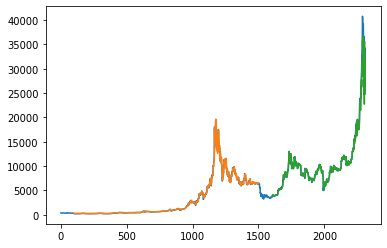

In [27]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [28]:
len(test_data)

810

In [29]:
x_input=test_data[707:].reshape(1,-1)
x_input.shape

(1, 103)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

temp_input

[0.2846891836741562,
 0.28898017259898473,
 0.3113180731031483,
 0.31481890710336197,
 0.3139731917792928,
 0.3183189717441524,
 0.3164260715379194,
 0.31751112211903304,
 0.3317646361231712,
 0.3223373035889826,
 0.3264387236173223,
 0.32911329201283684,
 0.33488570721202776,
 0.33380529669222464,
 0.32921094945266594,
 0.339053794889521,
 0.3435690208573908,
 0.3791711669923632,
 0.3788272983625966,
 0.36080327448138744,
 0.3767023716045809,
 0.3730772179252208,
 0.37205768101567255,
 0.3821621243385559,
 0.39631798090286485,
 0.3973387920277991,
 0.39119223968724126,
 0.38842138422797945,
 0.40714449302016087,
 0.4300225386899457,
 0.4339270570640513,
 0.4342491679454155,
 0.45404814338140403,
 0.45456311687235057,
 0.44786115288325967,
 0.44771637369896156,
 0.46601654069465415,
 0.45677606035727386,
 0.4178416126492497,
 0.41680219324796247,
 0.431795278425626,
 0.4431216177395173,
 0.47877817027173725,
 0.4585209597743281,
 0.4683215158494165,
 0.4743360311102991,
 0.455979510327

In [31]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.28898017 0.31131807 0.31481891 0.31397319 0.31831897 0.31642607
 0.31751112 0.33176464 0.3223373  0.32643872 0.32911329 0.33488571
 0.3338053  0.32921095 0.33905379 0.34356902 0.37917117 0.3788273
 0.36080327 0.37670237 0.37307722 0.37205768 0.38216212 0.39631798
 0.39733879 0.39119224 0.38842138 0.40714449 0.43002254 0.43392706
 0.43424917 0.45404814 0.45456312 0.44786115 0.44771637 0.46601654
 0.45677606 0.41784161 0.41680219 0.43179528 0.44312162 0.47877817
 0.45852096 0.46832152 0.47433603 0.45597951 0.46716785 0.47186733
 0.4680886  0.44665835 0.45238888 0.44527595 0.44020233 0.45853716
 0.46687618 0.46944297 0.47363877 0.52025484 0.55704909 0.56524217
 0.5832599  0.57359614 0.55699788 0.58112292 0.56778737 0.57996387
 0.60283076 0.64646118 0.64240544 0.66240848 0.66924335 0.7056425
 0.70960039 0.71876918 0.78654734 0.80266658 0.78272273 0.83246523
 0.90218379 0.96487977 1.         0.9866305  0.93990158 0.87122066
 0.830755   0.9142961  0.96035695 0.90220851 0.88627

ValueError: cannot reshape array of size 102 into shape (1,100,1)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[2205:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2206:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)